# Homework 1

#### EE-556 Mathematics of Data - Fall 2024


In this homework, we consider a multiclass classification task modeled by multinomial (softmax) logistic regression. Your goal will be to analyze the estimator and its properties (convexity, existence/uniqueness), and to derive gradients/Hessians and smoothness bounds. The first part consists of theoretical questions only.


<div class="alert alert-info">
  ℹ️ <strong>Information on group based work:</strong>
</div>

- You are to deliver only 1 notebook per group.
- Asking assistance beyond your group is ok, but answers should be individual to the group.
- In the event that there was <span style="color: red;">disproportional work done</span> by different group members, let the TAs know.
- Only one member of the group is allowed to use AI. We will require sharing the conversation history with the AI in the form of a public link. If you use multiple conversations across the same or multiple tools please share all of them. Name the person in your group who is allowed to use AI. We encourage you to use the AI to help you understand the material, but we ask you to write the code and theory solutions by yourself.

<div style="border: 1px solid #f00; background-color: #fdd; padding: 10px; border-radius: 5px;">
  ⚠️ Do not forget: Write who are the people in your group as well as their respective SCIPER numbers
</div>


Person 1 **Name**: Fiona Maria Jetzer || Person 1 **SCIPER**: 363927


Person 2 **Name**: Duc Dat Dang || Person 2 **SCIPER**: 415129


Person 3 **Name**: Pierre Mailler|| Person 3 **SCIPER**: 


<div style="border: 1px solid #0a0; background-color: #dfd; padding: 10px; border-radius: 5px;">
  📓 Feedback on AI use: Please use the following cell to provide feedback on the AI use in this notebook.
  
  For example, how useful were the tools to you? Which tools did you use? Did you feel like they helped you understand the material better?
</div

## 1. Multiclass Softmax Logistic Regression - 15 Points


We now model multiclass classification with classes $c \in \{1,\dots,C\}$. For each sample $(\mathbf{a}_i, b_i)$ with $\mathbf{a}_i \in \mathbb{R}^p$ and $b_i \in \{1,\dots,C\}$, let $\mathbf{X} = [\mathbf{x}_1,\dots,\mathbf{x}_C] \in \mathbb{R}^{p\times C}$ be the class weight matrix. The softmax model defines

$$
\mathbb{P}(b_i = c \mid \mathbf{a}_i) = \frac{\exp(\mathbf{a}_i^\top \mathbf{x}_c)}{\sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k)}.
$$

Assume i.i.d. samples $\{(\mathbf{a}_i,b_i)\}_{i=1}^n$. Our goal is to estimate $\mathbf{X}$ by maximum likelihood (and later with an $\ell_2$ regularizer).


__(a)__ (1 point) Show that the negative log-likelihood $f$ can be written as:

$$
\begin{aligned}
 f(\mathbf{X})
 &= - \log \mathbb{P}(b_1,\dots,b_n\mid \mathbf{a}_1,\dots,\mathbf{a}_n)\\
 &= \sum_{i=1}^n \left[ -\mathbf{a}_i^\top \mathbf{x}_{b_i} + \log \sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k) \right].
\end{aligned}
$$



$$
\begin{aligned}
 f(\mathbf{X})
 &= - \log \mathbb{P}(b_1,\dots,b_n\mid \mathbf{a}_1,\dots,\mathbf{a}_n)\\
 &= - \log \prod_{i=1}^{n} P(b_i \mid a_i)\\
 &= \sum_{i=1}^{n} - \log  \frac{\exp(\mathbf{a}_i^\top \mathbf{x}_{b_i})}{\sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k)}\\
 &= \sum_{i=1}^{n} - \log (\exp(\mathbf{a}_i^\top \mathbf{x}_{b_i})) + \log \sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k) \\
 &= \sum_{i=1}^n \left[ -\mathbf{a}_i^\top \mathbf{x}_{b_i} + \log \sum_{k=1}^C \exp(\mathbf{a}_i^\top \mathbf{x}_k) \right].
\end{aligned}
$$

__(b)__ (2 points) Show that $\mathbf{u} \mapsto \log\!\left(\sum_{k=1}^C e^{u_k}\right)$ is convex on $\mathbb{R}^C$. Then, show that $f(\mathbf{X})$ is convex.


Hint: use Jensen's inequality.

Let $u, v \in \mathbb{R}^C$ and $\lambda \in [0,1]$ and we note $X = [\exp(\lambda u_1) \dots \exp(\lambda u_c)]$ and $Y=[\exp((1-\lambda) v_1) \dots \exp((1-\lambda) v_c)]$,

$$
\begin{aligned}
\log\left(\sum_{k=1}^{C} \exp(\lambda u_k + (1-\lambda) v_k)\right)
&= \log\left(\sum_{k=1}^{C} \exp(\lambda u_k)\exp((1-\lambda) v_k)\right) \\
&= \log(X Y^\top)
\end{aligned}
$$

As $\lambda + (1-\lambda) = 1$, Hölder's inequality holds for $p=1/\lambda$ and $q=1/(1-\lambda)$.

$$
\begin{aligned}
X Y^\top &\leq \|X\|_p \|Y\|_q \\
\log(X Y^\top) &\leq \log(\|X\|_p \|Y\|_q) \\
&\leq \log\left(\left[\sum_{k=1}^{C} \exp(\lambda u_k)^{1/\lambda}\right]^\lambda \left[\sum_{k=1}^{C} \exp((1-\lambda) v_k)^{1/(1-\lambda)}\right]^{1-\lambda}\right) \\
&\leq \lambda \log\left(\sum_{k=1}^{C} \exp(u_k)\right) + (1-\lambda) \log\left(\sum_{k=1}^{C} \exp(v_k)\right)
\end{aligned}
$$

Thus, we proved:
$$
\log\left(\sum_{k=1}^{C} \exp(\lambda u_k + (1-\lambda) v_k)\right) \leq \lambda \log\left(\sum_{k=1}^{C} \exp(u_k)\right) + (1-\lambda) \log\left(\sum_{k=1}^{C} \exp(v_k)\right)
$$

Which means that $u \mapsto \log\left(\sum_{k=1}^{C} \exp(u_k)\right)$ is convex by Jensen's inequality definition.

Now, Let's prove that $ f $ is convex.

Let $ x, y \in \mathbb{R}^{pxC} $, $ x \in [0, 1] $.

$$
\begin{aligned}
f(\lambda x + (1-\lambda)y) &= \sum_{i=1}^n -a_i^T (\lambda x_{b_i} + (1-\lambda)y_{b_i}) + \log \sum_{k=1}^c \exp \{ a_i^T (\lambda x_k + (1-\lambda)y_k) \} \\
&\leq \sum_{i=1}^n (-\lambda a_i^T x_{b_i} - (1-\lambda)a_i^T y_{b_i}) + \lambda \log \sum_{k=1}^c e^{a_i^T x_k} + (1-\lambda) \log \sum_{k=1}^c e^{a_i^T y_k} \\
&\leq \sum_{i=1}^n \left[ \lambda (-a_i^T x_{b_i} + \log \sum_{k=1}^c e^{a_i^T x_k}) + (1-\lambda) (-a_i^T y_{b_i} + \log \sum_{k=1}^c e^{a_i^T y_k}) \right] \\
&\leq \lambda \sum_{i=1}^n (-a_i^T x_{b_i} + \log \sum_{k=1}^c e^{a_i^T x_k}) + (1-\lambda) \sum_{i=1}^n (-a_i^T y_{b_i} + \log \sum_{k=1}^c e^{a_i^T y_k}) \\
&\leq \lambda f(x) + (1-\lambda) f(y)
\end{aligned}
$$

Thus, we proved that $ f $ is convex.

You have just established that the negative log-likelihood is a convex function. So in principle, any local minimum of the maximum likelihood estimator
$$
\mathbf{X}^\star_{ML} = \arg\min_{\mathbf{X} \in \mathbb{R}^{p\times C}} f(\mathbf{X})
$$

is a global minimum. But does the minimum always exist? We will ponder this question in the following three points.


__(c)__ (1 point) Explain the difference between infima and minima. Give an example of a convex function on $\mathbb{R}$ that does not attain its infimum.


Infimum ($ \inf f $): Greatest lower bound of function $ f $
- $ \inf f = \inf \{ f(x) : x \in \text{dom(f)} \} $
- May not be attained by the function
- Always exists for bounded functions

Minimum ($ \min f $): Smallest value actually attained
- $ \min f = f(x_0) $ for some $ x_0 $ in domain
- Requires $ \exists x_0 $ such that $ f(x_0) = \inf f $

Key difference:
- $ \inf f $ is the "best possible" lower bound
- $ \min f $ is the "actual lowest value" attained
- $ \min f $ exists $ \Rightarrow \min f = \inf f $
- But $ \inf f $ can exist without $ \min f $

An example of a convex function on $\mathbb{R}$ that does not attain its infimum is $g(x) = \exp(x)$.

We have g convex because $g''(x) = \exp(x) \geq 0$ and $g$ does not attain its infimum as $ \lim_{x \to -\infty} g(x) = 0 $

__(d)__ (1 point) Assume there exists $\mathbf{X}_0 \in \mathbb{R}^{p\times C}$ such that for all $i$,
$$
\mathbf{a}_i^\top \mathbf{x}_{0, b_i} - \max_{k \neq b_i} \mathbf{a}_i^\top \mathbf{x}_{0,k} > 0.
$$
This is called one-versus-all complete separation in multiclass settings. Give a geometric interpretation (e.g., for $p=2$) and explain why the name is appropriate.


The condition means that for each observation $i$, the score of its true class $b_i$ is strictly greater than the maximum score of all other classes.

Each $\mathbf{x}_{0,k}$ represents a "prototype" or "weight vector" for class $k$ in $\mathbb{R}^2$.
The dot product $\mathbf{a}_i^\top \mathbf{x}_{0,k}$ measures the alignment between the observation $\mathbf{a}_i$ and the class prototype $k$.
The condition means that each point $\mathbf{a}_i$ is closer (in terms of directional alignment) to the prototype of its true class than to any other prototype

This terminology is appropriate because:

"Complete Separation": The classes are perfectly separable - there exists a linear classifier that can correctly classify all observations without any errors.

"One-versus-All": For each class $k$, we can find a hyperplane that perfectly separates the points of class $k$ from all points of the other classes combined.

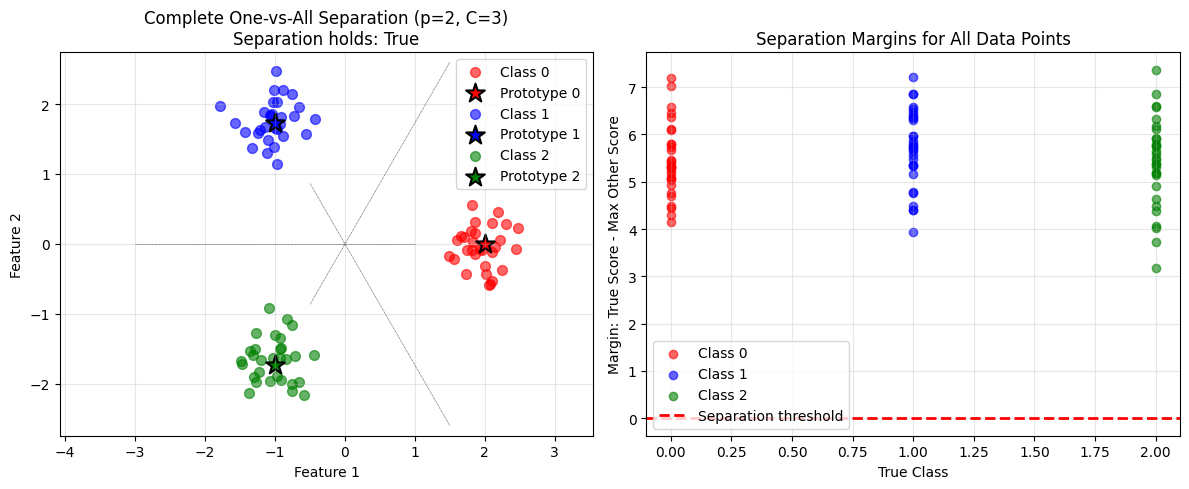

Separation condition holds: True
Number of violations: 0
Minimum margin: 3.1731


In [ ]:
'''This script has been generated by AI : '''

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data for 3 classes in 2D
n_per_class = 30
p = 2  # dimension
C = 3  # number of classes

# Generate class prototypes (separated vectors)
theta = np.linspace(0, 2*np.pi, C+1)[:C]
X0 = np.column_stack([np.cos(theta), np.sin(theta)]) * 2

# Generate data points for each class
# Points are generated around their class prototype
data = []
true_labels = []

for k in range(C):
    # Generate points clustered around the class prototype
    center = X0[k] + np.random.normal(0, 0.3, (n_per_class, p))
    data.append(center)
    true_labels.extend([k] * n_per_class)

data = np.vstack(data)
true_labels = np.array(true_labels)

# Verify the separation condition
def check_separation_condition(data, labels, X0):
    """Check if the complete separation condition holds"""
    n = len(data)
    violations = 0
    
    for i in range(n):
        true_class = labels[i]
        true_score = data[i] @ X0[true_class]
        
        # Scores for other classes
        other_scores = [data[i] @ X0[k] for k in range(C) if k != true_class]
        max_other_score = max(other_scores)
        
        if true_score <= max_other_score:
            violations += 1
    
    return violations == 0, violations

separation_holds, violations = check_separation_condition(data, true_labels, X0)

# Create the plot
plt.figure(figsize=(12, 5))

# Plot 1: Data points and class prototypes
plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
class_names = ['Class 0', 'Class 1', 'Class 2']

for k in range(C):
    # Plot data points
    class_mask = (true_labels == k)
    plt.scatter(data[class_mask, 0], data[class_mask, 1], 
                c=colors[k], alpha=0.6, label=class_names[k], s=50)
    
    # Plot class prototype as a star
    plt.scatter(X0[k, 0], X0[k, 1], c=colors[k], marker='*', s=200, 
                edgecolors='black', linewidth=1.5, label=f'Prototype {k}')
    
    # Draw decision boundaries (simplified - Voronoi regions)
    for j in range(C):
        if j != k:
            midpoint = (X0[k] + X0[j]) / 2
            direction = X0[k] - X0[j]
            perpendicular = np.array([-direction[1], direction[0]])
            perpendicular = perpendicular / np.linalg.norm(perpendicular)
            
            # Draw part of the decision boundary
            t = np.linspace(-2, 2, 100)
            boundary_points = midpoint.reshape(1, -1) + t.reshape(-1, 1) * perpendicular.reshape(1, -1)
            plt.plot(boundary_points[:, 0], boundary_points[:, 1], 
                    'k--', alpha=0.3, linewidth=0.5)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'Complete One-vs-All Separation (p=2, C=3)\nSeparation holds: {separation_holds}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')

# Plot 2: Score distributions to illustrate the separation condition
plt.subplot(1, 2, 2)
scores_data = []

for i in range(len(data)):
    true_class = true_labels[i]
    scores = [data[i] @ X0[k] for k in range(C)]
    true_score = scores[true_class]
    max_other_score = max([scores[k] for k in range(C) if k != true_class])
    
    scores_data.append({
        'true_class': true_class,
        'true_score': true_score,
        'max_other_score': max_other_score,
        'margin': true_score - max_other_score
    })

# Convert to DataFrame for easier plotting
import pandas as pd
scores_df = pd.DataFrame(scores_data)

# Plot the score distributions
for k in range(C):
    class_scores = scores_df[scores_df['true_class'] == k]
    plt.scatter([k] * len(class_scores), class_scores['margin'], 
                c=colors[k], alpha=0.6, label=class_names[k])

plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Separation threshold')
plt.xlabel('True Class')
plt.ylabel('Margin: True Score - Max Other Score')
plt.title('Separation Margins for All Data Points')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Separation condition holds: {separation_holds}")
print(f"Number of violations: {violations}")
print(f"Minimum margin: {scores_df['margin'].min():.4f}")

From this, you should see that it is likely that some datasets satisfy the complete separation assumption. Unfortunately, as you will show next, this can become an obstacle.


__(e)__ (1 point) In a one-versus-all complete separation setting (as in (d)), prove that $f$ does not attain its minimum. Hint: consider $f(\alpha \mathbf{X}_0)$ as $\alpha \to +\infty$ and compare it to $f(\mathbf{X}_0)$.


Plan of the proof: We want to prove that $f$ does not attain its minimum. To do so, we are going to show that $f(\alpha X_0) \to 0$ when $\alpha \to +\infty$. As $f(X) \geq 0$ for all $X$, it means that $\inf f(X) = 0$. Then we will conclude that $f$ does not attain its minimum by showing that $f(X) > 0$.

1. Let's show that $f(\alpha X_0) \to 0$

\begin{align*}
f(\alpha X_0) &= \sum_{i=1}^n \left[ -a_i^T (\alpha x_{0,b_i}) + \log \sum_{k=1}^C \exp(a_i^T (\alpha x_{0,k})) \right] \\
&= \sum_{i=1}^n \left[ -a_i^T (\alpha x_{0,b_i}) + \log \left( \exp(a_i^T (\alpha x_{0,b_i})) + \sum_{k \neq b_i} \exp(a_i^T (\alpha x_{0,k})) \right) \right] \\
&= \sum_{i=1}^n \left[ -a_i^T (\alpha x_{0,b_i}) + a_i^T (\alpha x_{0,b_i}) + \log \left( 1 + \sum_{k \neq b_i} \exp(a_i^T (\alpha x_{0,k}) - a_i^T (\alpha x_{0,b_i})) \right) \right] \\
&= \sum_{i=1}^n \log \left( 1 + \sum_{k \neq b_i} \exp(\alpha (a_i^T x_{0,k} - a_i^T x_{0,b_i})) \right)
\end{align*}

We have: $\forall i,\ \mathbf{a}_i^\top \mathbf{x}_{0, b_i} - \max_{k \neq b_i} \mathbf{a}_i^\top \mathbf{x}_{0,k} > 0$

We can deduce that: $\forall k \neq b_i, \forall i,\ \mathbf{a}_i^\top \mathbf{x}_{0,k} - \mathbf{a}_i^\top \mathbf{x}_{0,b_i} < 0$

This implies: $\forall k \neq b_i,\ \exp(\alpha(\mathbf{a}_i^\top \mathbf{x}_{0,k} - \mathbf{a}_i^\top \mathbf{x}_{0,b_i})) \to 0$ for $\alpha \to \infty$

Thus: $\lim_{\alpha \to \infty} f(\alpha X_0) = \sum_{i=1}^n \log(1 + 0) = 0$

As $\inf_X f(X) \leq \lim_{\alpha \to \infty} f(\alpha X_0)$, we have $\inf_X f(X) \leq 0$

2. Now let's show that $f(X) > 0$

\begin{align*}
f(X) &= \sum_{i=1}^n \left[ -a_i^T x_{b_i} + \log \sum_{k=1}^C \exp(a_i^T x_k) \right]
\end{align*}

It holds that $\sum_{k=1}^C \exp(a_i^T x_k) > \exp(a_i^T x_{b_i})$ for all $i$

Therefore:
\begin{align*}
f(X) &> \sum_{i=1}^n \left[ -a_i^T x_{b_i} + \log (\exp(a_i^T x_{b_i})) \right] \\
&= \sum_{i=1}^n \left[ -a_i^T x_{b_i} + a_i^T x_{b_i} \right] \\
&= 0
\end{align*}

So $f(X) > 0$ for all $X$.

3. Conclusion:

We have $f(X) > 0$ for all $X$ and $\inf_X f(X) \leq 0$, which proves that $f$ does not attain its minimum.

We resolve this issue by adding a regularizer. Consider the regularized function

$$
 f_\mu(\mathbf{X}) = f(\mathbf{X}) + \frac{\mu}{2} \|\mathbf{X}\|_F^2, \quad \mu > 0.
$$

__(f)__ (1 point) Show that the gradient with respect to $\mathbf{X}$ of $f_\mu$ can be expressed as
$$
 \nabla_{\mathbf{X}} f_\mu(\mathbf{X}) = \sum_{i=1}^n \mathbf{a}_i \big( \mathbf{p}_i - \mathbf{e}_{b_i} \big)^\top + \mu \mathbf{X},\tag{1}
$$
where $\mathbf{e}_{b_i} \in \mathbb{R}^C$ is the [one-hot vector](https://en.wikipedia.org/wiki/One-hot) for class $b_i$, $\mathbf{p}_i \in \mathbb{R}^C$ has entries $p_{i,c} = \mathbb{P}(b_i=c\mid \mathbf{a}_i)$ under the softmax model, and $\mathbf{a}_i(\mathbf{p}_i - \mathbf{e}_{b_i})^\top$ denotes the outer product.



We have
$$
\nabla_{\mathbf{X}}f_\mu(\mathbf{X}) = \nabla_{\mathbf{X}} f(\mathbf{X}) + \nabla_{\mathbf{X}} \left( \frac{\mu}{2} \|\mathbf{X}\|_F^2 \right)
$$

With:
$$
\nabla_{\mathbf{X}} \left( \frac{\mu}{2} \|\mathbf{X}\|_F^2 \right) = \mu \mathbf{X}
$$

And:
\begin{align*}
\nabla_{\mathbf{X}} f(\mathbf{X}) &= \nabla_{\mathbf{X}} \left( \sum_{i=1}^n - \mathbf{a}_i^T \mathbf{x}_{b_i} + \log \sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k) \right) \\
&= \sum_{i=1}^n \nabla_{\mathbf{X}} (-\mathbf{a}_i^T \mathbf{x}_{b_i}) + \nabla_{\mathbf{X}} \left( \log \sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k) \right)
\end{align*}

We have:
$$
\nabla_{\mathbf{X}} (-\mathbf{a}_i^T \mathbf{x}_{b_i}) = -\mathbf{a}_i \mathbf{e}_{b_i}^T
$$

and for $j = 1, \ldots, C$:
$$
\frac{\partial}{\partial \mathbf{x}_j} \left( \log \sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k) \right) = \frac{\mathbf{a}_i \exp(\mathbf{a}_i^T \mathbf{x}_j)}{\sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k)}
$$

We deduce that:
$$
\nabla_{\mathbf{X}} \left( \log \sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k) \right) = 
\begin{bmatrix}
\mathbf{a}_i \mathbb{P}(b_i = 1 | \mathbf{a}_i) &
\cdots &
\mathbf{a}_i \mathbb{P}(b_i = j | \mathbf{a}_i) &
\cdots &
\mathbf{a}_i \mathbb{P}(b_i = C | \mathbf{a}_i)
\end{bmatrix} = \mathbf{a}_i \mathbf{p}_i^T
$$

We conclude that:
\begin{align*}
\nabla_{\mathbf{X}} f(\mathbf{X}) &= \sum_{i=1}^n -\mathbf{a}_i \mathbf{e}_{b_i}^T + \mathbf{a}_i \mathbf{p}_i^T \\
&= \sum_{i=1}^n \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T
\end{align*}

We finally wrap it together to show:
$$
\nabla_{\mathbf{X}} f_\mu(\mathbf{X}) = \sum_{i=1}^n \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T + \mu \mathbf{X}
$$

__(g)__ (1 point) Show that the Hessian of $f_\mu$ can be written as
$$
 \nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I},\tag{2}
$$
where $\otimes$ is the Kronecker product, and $\operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top$ is the softmax Jacobian, which is positive semidefinite.


We have :

\begin{aligned}
\nabla^2 f_\mu(\mathbf{X}) 
&= \nabla \left( \sum_{i=1}^n \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T + \mu \mathbf{X} \right) \\
&= \sum_{i=1}^n \nabla \left[ \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T \right] + \nabla (\mu \mathbf{X}) \\
&= \sum_{i=1}^n \nabla \left[ \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T \right] + \mu \mathbf{I}
\end{aligned}

Let's now focus on: $\nabla \left[ \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T \right]$

For the $(l,j)$-th component:
$$
\left( \nabla \left[ \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T \right] \right)_{l,j} = \mathbf{a}_i \mathbf{a}_i^T \left( \mathbb{\delta}_l^j \mathbf{p}_{i,l} - \mathbf{p}_{i,l} \mathbf{p}_{i,j} \right)
$$

With $\mathbf{p}_i$ defined as:
$$
\mathbf{p}_i = \begin{bmatrix}
\mathbb{P}(b_i = 1 | \mathbf{a}_i) \\
\vdots \\
\mathbb{P}(b_i = C | \mathbf{a}_i)
\end{bmatrix} = \begin{bmatrix}
\displaystyle\frac{\exp(\mathbf{a}_i^T \mathbf{x}_1)}{\sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k)} \\
\vdots \\
\displaystyle\frac{\exp(\mathbf{a}_i^T \mathbf{x}_C)}{\sum_{k=1}^C \exp(\mathbf{a}_i^T \mathbf{x}_k)}
\end{bmatrix}
$$

We conclude that:
$$
\nabla \left[ \mathbf{a}_i (\mathbf{p}_i - \mathbf{e}_{b_i})^T \right] = (\mathbf{a}_i \mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i \mathbf{p}_i^\top \big)
$$

We wrap it together to find that:
$$
\nabla^2 f_\mu(\mathbf{X}) = \sum_{i=1}^n (\mathbf{a}_i \mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i \mathbf{p}_i^\top \big) + \mu \mathbf{I}
$$

__(h)__ (1 point) Show that $f_\mu$ is $\mu$-strongly convex.


We know that $\operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top$ is positive semidefinite.
And $a_i a_i^T = \|a_i\|_{2}^2 \geq 0$

We deduce that $\sum_{i=1}^n (\mathbf{a}_i \mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i \mathbf{p}_i^\top \big) \geq 0$

We conclude that $\nabla^2 f_\mu(\mathbf{X}) \geq \mu \mathbf I$
Which means by definition that $f_\mu$ is $\mu$-strongly convex.

__(i)__ (1 point) Is it possible for a strongly convex function to not attain its minimum? Justify your reasoning (you may assume the domain is $\mathbb{R}^{p\times C}$).


No, it is impossible for a strongly convex function to not attain its minimum.

Let $f$ be a twice continuously differentiable $\mu$-strongly convex function. Then $\nabla ^2 f \geq \mu \mathbf I > 0$.
This implies that $\nabla f$ is strictly increasing. 

As $f$ is strongly convex, we know that $f$ is coercive. Which means that $\lim_{\|\mathbf{X}\| \to \infty} f(\mathbf{X}) = +\infty$.

As $f$ is coercive, we now know that there exist $x,y \in dom(f)$ such that $\nabla f(x)<0$ and $\nabla f(y)>0$.

By continuity, there exist $x^*$ such that $\nabla f(x^*) = 0$

As $f$ is convex and coercive, we know that $x^*$ is the unique and global minimum of the function.

We will now show that $f_\mu$ is smooth, i.e., $\nabla f_\mu$ is L-Lipschitz with respect to the Frobenius norm, with a simple conservative bound
$$
 L = \|\mathbf{A}\|_F^2 + \mu.
$$
where
$$
 \mathbf{A} = \begin{bmatrix}
  \leftarrow &  \mathbf{a}_1^\top & \rightarrow \\
  \leftarrow &  \mathbf{a}_2^\top & \rightarrow \\
   &  \ldots &  \\
  \leftarrow &  \mathbf{a}_n^\top & \rightarrow \\
 \end{bmatrix}.
$$
(You may use that the operator norm of the softmax Jacobian is bounded by 1/4, and a looser bound $\le 1$ is acceptable for grading.)

Hint: check the properties of the spectral norm with respect to dot product, Kronecker product, and outer product.

(1 point for all three questions)


__(j-1)__ Show that $\lambda_{\max}(\mathbf{a}_i\mathbf{a}_i^T) = \left\| \mathbf{a}_i\right\|_2^2$, where $\lambda_{\max}(\cdot)$ denotes the largest eigenvalue.


For $a_i \in \mathbb R^p$, $a_i a_i^T = \sum_{k=1}^p a_{i,k}^2$

$\lambda_{\text max}(a_i a_i^T) = \sum_{k=1}^p a_{i,k}^2 = \|a_i\|_2^2$

__(j-2)__ Using (2), show that $\lambda_{\max}(\nabla^2 f_\mu(\mathbf{X})) \leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu$.

$$
\begin{aligned}
\lambda_{\text max} (\nabla ^2 f_\mu (x))
&= \lambda_{\text max} (\sum_{i=1}^n (\mathbf{a}_i\mathbf{a}_i^\top) \otimes \big( \operatorname{Diag}(\mathbf{p}_i) - \mathbf{p}_i\mathbf{p}_i^\top \big) + \mu \mathbf{I}) \\
&= \lambda_{\text max} (\sum_{i=1}^n \mathbf{a}_i\mathbf{a}_i^\top \otimes \operatorname{Diag}(\mathbf{p}_i) - \mathbf{a}_i\mathbf{a}_i^\top \otimes \mathbf{p}_i\mathbf{p}_i^\top) + \mu \\
&\leq \mu + \sum_{i=1}^n \lambda_{\text max} (\mathbf{a}_i\mathbf{a}_i^\top \otimes \operatorname{Diag}(\mathbf{p}_i)) - \lambda_{\text max} (\mathbf{a}_i\mathbf{a}_i^\top \otimes \mathbf{p}_i\mathbf{p}_i^\top) \\
&\leq \mu + \sum_{i=1}^n \lambda_{\text max} (\mathbf{a}_i\mathbf{a}_i^\top \otimes \operatorname{Diag}(\mathbf{p}_i)) \\
&\leq \mu + \sum_{i=1}^n \lambda_{\text max} (\mathbf{a}_i\mathbf{a}_i^\top \otimes \mathbf I ) \\
&\leq \mu + \sum_{i=1}^n \lambda_{\text max} (\mathbf{a}_i\mathbf{a}_i^\top) \\
&\leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu
\end{aligned}
$$

__(j-3)__ Conclude that $f_\mu$ is $L$-smooth for $L = \|\mathbf{A}\|_F^2 + \mu$.


We define $h(x) = \frac h 2 \|X\|_2^2 - f(X)$

We deduce that $\nabla h(X) = LX - \nabla f(X)$ and $ \nabla^2 h(X) = L\mathbf I - \nabla^2 f(X)$

We proved that : $\lambda_{\max}(\nabla^2 f_\mu(\mathbf{X})) \leq \sum_{i=1}^{n} \|\mathbf{a}_i\|_2^2 + \mu = \mu + \|A\|_F$

Then : $\|A\|_F + \mu - \lambda_{\max}(\nabla^2 f_\mu(\mathbf{X})) \geq 0$

This concludes that for all $\lambda \in Spectre\{L\mathbf I -\nabla^2 f(X) \}$, we have $\lambda \geq 0$

We deduce that $L\mathbf I -\nabla^2 f(X) \geq 0$, then $\nabla^2 h(X) \geq 0$

This proves that $h$ is convex and that $f$ is L-smooth.

__(l)__ (1 point) KL divergence and NLL. Let $q(b_i\mid\mathbf{a}_i)$ be the true label distribution and $p(b_i\mid\mathbf{a}_i)$ the model softmax. Write the KL divergence $\mathrm{KL}(q\,\|\,p)$ and show that minimizing the KL divergence between $q$ and $p$ is equivalent to minimizing the negative log-likelihood derived in (a).


$$
\begin{aligned}
D_{KL} (q||p)
&= \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(\frac{q(b_j | a_i)}{p(b_j|a_i)}) \\
&= \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) (\log(q(b_j | a_i)) - \log(p(b_j|a_i))) \\
&= \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(q(b_j | a_i)) - \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(p(b_j|a_i)) \\
&= \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(q(b_j | a_i)) - \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(\frac{e^{a_i^Tx_j}}{\sum_{k=1}^C e^{a_i^Tx_k}}) \\
&= \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i) \log(q(b_j | a_i)) + \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i)  (-a_i^Tx_j + \log{\sum_{k=1}^C e^{a_i^Tx_k}}) \\
\end{aligned}
$$

Knowing that the first term doesnt depend on X we can write :
$$
\begin{aligned}
min_{X\in\mathbb{R}^{pxC}} D_{KL}(q||p) 
&= min_{X\in\mathbb{R}^{pxC}} \sum_{i=1}^n \sum_{j=1}^C q(b_j | a_i)  (-a_i^Tx_j + \log{\sum_{k=1}^C e^{a_i^Tx_k}}) \\
&= min_{X\in\mathbb{R}^{pxC}} \sum_{i=1}^n -a_i^Tx_{b_i} + \log{\sum_{k=1}^C e^{a_i^Tx_k}} \\
&= min_{X\in\mathbb{R}^{pxC}} f(X)
\end{aligned}
$$

From your work in this section, you have shown that the maximum likelihood estimator for multiclass softmax logistic regression might not exist, but it can be guaranteed to exist by adding a $\|\cdot\|_F^2$ regularizer. Consequently, the estimator for $\mathbf{X}$ we will use will be the solution of the smooth strongly convex problem,
$$
 \mathbf{X}^\star = \arg\min_{\mathbf{X} \in \mathbb{R}^{p\times C}} f(\mathbf{X}) + \frac{\mu}{2}\|\mathbf{X}\|_F^2.\tag{3}
$$


## Binary logistic regression (specialization for Part 2)

While this part analyzed the multiclass (softmax) setting, in the next exercise we will continue under the simplified two-class case.

Let labels be $b_i \in \{-1, +1\}$, features $\mathbf{a}_i \in \mathbb{R}^p$, and weight vector $\mathbf{x} \in \mathbb{R}^p$. Define the sigmoid
$$
\sigma(t) = \frac{1}{1+e^{-t}}.
$$
Model the conditional distribution as
$$
\mathbb{P}(b_i = j \mid \mathbf{a}_i) = \sigma\big(j\, \mathbf{a}_i^\top \mathbf{x}\big), \quad j \in \{-1,+1\}.
$$
The likelihood over i.i.d. samples $\{(\mathbf{a}_i, b_i)\}_{i=1}^n$ is
$$
\mathcal{L}(\mathbf{x}) = \prod_{i=1}^n \sigma\big(b_i\, \mathbf{a}_i^\top \mathbf{x}\big),
$$
so the negative log-likelihood is
$$
 f(\mathbf{x}) = -\log \mathcal{L}(\mathbf{x}) = \sum_{i=1}^n \log\big(1 + e^{-b_i\, \mathbf{a}_i^\top \mathbf{x}}\big).
$$

__(m)__ (1 point) Show that the gradient of the negative log-likelihood is the standard binary logistic regression gradient:
$$
\nabla f(\mathbf{x}) = \sum_{i=1}^n \big(-b_i\, \sigma(-b_i\, \mathbf{a}_i^\top \mathbf{x})\big)\, \mathbf{a}_i.
$$
(Hint: use the chain rule and $\sigma'(t) = \sigma(t)\big(1-\sigma(t)\big)$.)

We will use this binary formulation in Part 2 - First order methods.


$$
\begin{aligned}
\nabla f(x) 
&= \nabla (\sum_{i=1}^n log(1+e^{-b_ia_i^Tx})) \\
&= \sum_{i=1}^n \nabla (log(1+e^{-b_ia_i^Tx})) \\
&= \sum_{i=1}^n \frac{-a_ib_ie^{-b_ia_i^Tx}}{1 + e^{-b_ia_i^Tx}} \\
&= \sum_{i=1}^n \frac{-a_ib_i}{1 + e^{b_ia_i^Tx}}\\
&= \sum_{i=1}^n -b_i \sigma (-b_ia_i^Tx)a_i\\
\end{aligned}
$$

We conclude that : $\nabla f(X) = \sum_{i=1}^n -b_i \sigma (-b_ia_i^Tx)a_i$ 